In [3]:
#Common Libraries
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#keras libraries
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [6]:
#Uploading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [7]:
x_train = x_train/127.5-1

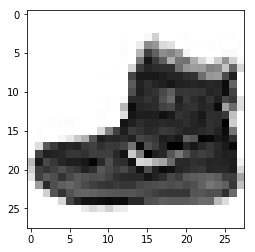

In [9]:
#Looking at a sample
plt.imshow(x_train[0], cmap='Greys')

In [10]:
#the setup 
x_train = np.expand_dims(x_train, axis=3)

In [13]:
def create_generator():
    #comment here
    model= Sequential()
    
    model.add(Dense(256, input_dim = 100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    
    model.summary()
    
    noise = Input(shape=(100,))
    img = model(noise)
    
    return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
__________

In [15]:
 def create_discriminator():
    model = Sequential()
    
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    img = Input(shape=(28,28,1))
    validity = model(img)
    
    return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [17]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [25]:
def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0,1 , (r*c, 100))
    gen_imgs = generator.predict(noise)
    
    #rescale images with the range 0-1
    gen_imgs = 0.5*gen_imgs+0.5
    
    fig, axs = plt.subplots(r,c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    plt.close()

0 [D loss: 0.367361, accuracy: 75.00%] [G loss: 0.869511]


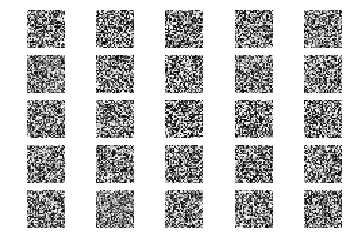

1 [D loss: 0.243443, accuracy: 95.31%] [G loss: 1.143614]
2 [D loss: 0.223063, accuracy: 98.44%] [G loss: 1.279157]
3 [D loss: 0.223752, accuracy: 92.19%] [G loss: 1.503725]
4 [D loss: 0.186189, accuracy: 96.88%] [G loss: 1.655487]
5 [D loss: 0.132784, accuracy: 100.00%] [G loss: 1.736511]
6 [D loss: 0.131638, accuracy: 100.00%] [G loss: 1.728288]
7 [D loss: 0.107289, accuracy: 100.00%] [G loss: 1.979429]
8 [D loss: 0.110756, accuracy: 100.00%] [G loss: 2.082279]
9 [D loss: 0.091369, accuracy: 100.00%] [G loss: 2.055783]
10 [D loss: 0.075505, accuracy: 100.00%] [G loss: 2.297725]
11 [D loss: 0.079231, accuracy: 100.00%] [G loss: 2.379454]
12 [D loss: 0.064699, accuracy: 100.00%] [G loss: 2.412462]
13 [D loss: 0.065806, accuracy: 100.00%] [G loss: 2.478140]
14 [D loss: 0.048733, accuracy: 100.00%] [G loss: 2.561159]
15 [D loss: 0.059266, accuracy: 100.00%] [G loss: 2.572849]
16 [D loss: 0.049113, accuracy: 100.00%] [G loss: 2.670533]
17 [D loss: 0.045426, accuracy: 100.00%] [G loss: 2.7

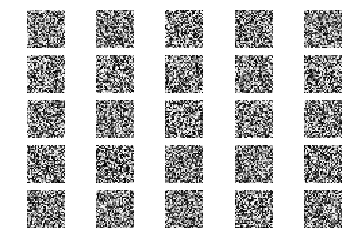

51 [D loss: 0.019544, accuracy: 100.00%] [G loss: 4.067082]
52 [D loss: 0.019571, accuracy: 100.00%] [G loss: 3.949909]
53 [D loss: 0.022549, accuracy: 100.00%] [G loss: 3.956595]
54 [D loss: 0.015022, accuracy: 100.00%] [G loss: 4.001545]
55 [D loss: 0.016339, accuracy: 100.00%] [G loss: 4.057828]
56 [D loss: 0.011257, accuracy: 100.00%] [G loss: 4.135402]
57 [D loss: 0.022659, accuracy: 100.00%] [G loss: 4.261233]
58 [D loss: 0.013644, accuracy: 100.00%] [G loss: 4.167128]
59 [D loss: 0.013849, accuracy: 100.00%] [G loss: 4.219790]
60 [D loss: 0.012047, accuracy: 100.00%] [G loss: 4.181531]
61 [D loss: 0.013153, accuracy: 100.00%] [G loss: 4.239634]
62 [D loss: 0.014311, accuracy: 100.00%] [G loss: 4.212977]
63 [D loss: 0.056957, accuracy: 98.44%] [G loss: 4.159534]
64 [D loss: 0.014696, accuracy: 100.00%] [G loss: 4.117313]
65 [D loss: 0.011022, accuracy: 100.00%] [G loss: 3.992227]
66 [D loss: 0.065808, accuracy: 98.44%] [G loss: 4.043591]
67 [D loss: 0.017036, accuracy: 100.00%] [

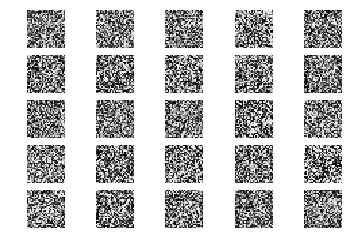

101 [D loss: 0.016968, accuracy: 100.00%] [G loss: 4.658309]
102 [D loss: 0.012392, accuracy: 100.00%] [G loss: 4.806747]
103 [D loss: 0.013726, accuracy: 100.00%] [G loss: 4.834886]
104 [D loss: 0.032629, accuracy: 98.44%] [G loss: 4.876608]
105 [D loss: 0.011364, accuracy: 100.00%] [G loss: 4.888193]
106 [D loss: 0.012112, accuracy: 100.00%] [G loss: 4.579427]
107 [D loss: 0.013189, accuracy: 100.00%] [G loss: 4.693420]
108 [D loss: 0.019886, accuracy: 98.44%] [G loss: 4.614860]
109 [D loss: 0.013554, accuracy: 100.00%] [G loss: 4.520821]
110 [D loss: 0.012335, accuracy: 100.00%] [G loss: 4.761003]
111 [D loss: 0.009982, accuracy: 100.00%] [G loss: 4.831289]
112 [D loss: 0.012604, accuracy: 100.00%] [G loss: 4.851637]
113 [D loss: 0.011143, accuracy: 100.00%] [G loss: 4.918883]
114 [D loss: 0.013405, accuracy: 100.00%] [G loss: 4.760276]
115 [D loss: 0.036330, accuracy: 98.44%] [G loss: 4.832492]
116 [D loss: 0.007494, accuracy: 100.00%] [G loss: 4.801722]
117 [D loss: 0.015865, accu

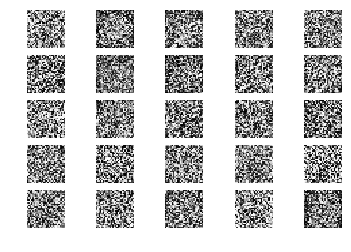

151 [D loss: 0.029085, accuracy: 100.00%] [G loss: 4.937545]
152 [D loss: 0.017784, accuracy: 100.00%] [G loss: 4.832031]
153 [D loss: 0.055161, accuracy: 96.88%] [G loss: 4.540093]
154 [D loss: 0.025651, accuracy: 100.00%] [G loss: 4.991029]
155 [D loss: 0.058850, accuracy: 98.44%] [G loss: 5.185569]
156 [D loss: 0.141403, accuracy: 96.88%] [G loss: 4.563132]
157 [D loss: 0.026069, accuracy: 100.00%] [G loss: 4.485032]
158 [D loss: 0.030969, accuracy: 100.00%] [G loss: 4.325669]
159 [D loss: 0.034747, accuracy: 98.44%] [G loss: 5.079679]
160 [D loss: 0.040595, accuracy: 100.00%] [G loss: 5.339780]
161 [D loss: 0.052980, accuracy: 100.00%] [G loss: 4.697529]
162 [D loss: 0.038955, accuracy: 100.00%] [G loss: 4.996985]
163 [D loss: 0.026957, accuracy: 100.00%] [G loss: 5.243197]
164 [D loss: 0.057071, accuracy: 98.44%] [G loss: 4.753932]
165 [D loss: 0.038907, accuracy: 100.00%] [G loss: 5.186290]
166 [D loss: 0.010753, accuracy: 100.00%] [G loss: 5.447458]
167 [D loss: 0.038867, accura

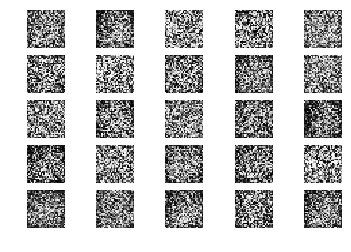

201 [D loss: 0.062605, accuracy: 98.44%] [G loss: 4.721808]
202 [D loss: 0.118925, accuracy: 95.31%] [G loss: 4.513153]
203 [D loss: 0.111717, accuracy: 96.88%] [G loss: 4.397764]
204 [D loss: 0.138256, accuracy: 95.31%] [G loss: 4.380151]
205 [D loss: 0.113011, accuracy: 95.31%] [G loss: 4.279038]
206 [D loss: 0.139748, accuracy: 95.31%] [G loss: 4.070679]
207 [D loss: 0.160966, accuracy: 96.88%] [G loss: 4.045090]
208 [D loss: 0.098695, accuracy: 98.44%] [G loss: 3.920570]
209 [D loss: 0.116436, accuracy: 96.88%] [G loss: 3.633319]
210 [D loss: 0.116459, accuracy: 95.31%] [G loss: 4.058451]
211 [D loss: 0.095703, accuracy: 96.88%] [G loss: 4.285208]
212 [D loss: 0.108830, accuracy: 98.44%] [G loss: 3.293915]
213 [D loss: 0.089807, accuracy: 93.75%] [G loss: 4.041218]
214 [D loss: 0.079639, accuracy: 98.44%] [G loss: 4.726747]
215 [D loss: 0.077753, accuracy: 98.44%] [G loss: 4.239892]
216 [D loss: 0.065982, accuracy: 100.00%] [G loss: 4.406315]
217 [D loss: 0.061421, accuracy: 98.44%

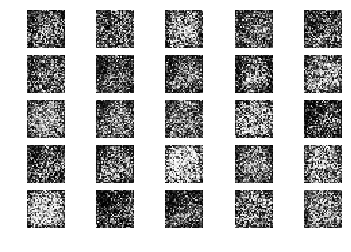

251 [D loss: 0.459387, accuracy: 76.56%] [G loss: 4.455701]
252 [D loss: 0.207623, accuracy: 92.19%] [G loss: 4.790659]
253 [D loss: 0.240412, accuracy: 92.19%] [G loss: 4.268649]
254 [D loss: 0.085102, accuracy: 96.88%] [G loss: 4.504078]
255 [D loss: 0.049052, accuracy: 100.00%] [G loss: 5.136515]
256 [D loss: 0.342459, accuracy: 92.19%] [G loss: 3.169937]
257 [D loss: 0.145176, accuracy: 95.31%] [G loss: 4.697840]
258 [D loss: 0.328128, accuracy: 84.38%] [G loss: 4.299767]
259 [D loss: 0.110624, accuracy: 95.31%] [G loss: 4.668977]
260 [D loss: 0.163984, accuracy: 95.31%] [G loss: 3.970982]
261 [D loss: 0.117869, accuracy: 92.19%] [G loss: 5.058175]
262 [D loss: 0.215815, accuracy: 93.75%] [G loss: 4.136489]
263 [D loss: 0.273012, accuracy: 89.06%] [G loss: 3.504404]
264 [D loss: 0.078843, accuracy: 98.44%] [G loss: 4.225273]
265 [D loss: 0.199779, accuracy: 93.75%] [G loss: 4.234719]
266 [D loss: 0.137291, accuracy: 92.19%] [G loss: 4.482715]
267 [D loss: 0.463340, accuracy: 78.12%

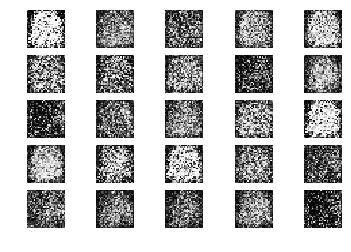

301 [D loss: 0.123259, accuracy: 96.88%] [G loss: 4.521543]
302 [D loss: 0.393826, accuracy: 84.38%] [G loss: 4.163262]
303 [D loss: 0.222870, accuracy: 92.19%] [G loss: 3.648834]
304 [D loss: 0.294276, accuracy: 87.50%] [G loss: 4.158617]
305 [D loss: 0.308504, accuracy: 90.62%] [G loss: 3.558361]
306 [D loss: 0.191192, accuracy: 92.19%] [G loss: 3.749937]
307 [D loss: 0.205530, accuracy: 92.19%] [G loss: 3.547677]
308 [D loss: 0.356491, accuracy: 81.25%] [G loss: 4.012214]
309 [D loss: 0.497264, accuracy: 79.69%] [G loss: 3.311473]
310 [D loss: 0.287608, accuracy: 90.62%] [G loss: 3.864060]
311 [D loss: 0.589652, accuracy: 78.12%] [G loss: 3.147486]
312 [D loss: 0.228564, accuracy: 90.62%] [G loss: 4.742925]
313 [D loss: 0.556418, accuracy: 75.00%] [G loss: 2.872540]
314 [D loss: 0.238188, accuracy: 89.06%] [G loss: 3.934157]
315 [D loss: 0.469195, accuracy: 79.69%] [G loss: 3.334961]
316 [D loss: 0.319653, accuracy: 89.06%] [G loss: 3.167012]
317 [D loss: 0.589873, accuracy: 76.56%]

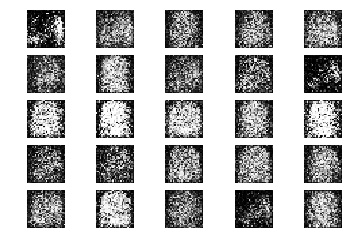

351 [D loss: 0.407065, accuracy: 85.94%] [G loss: 2.956723]
352 [D loss: 0.655754, accuracy: 78.12%] [G loss: 2.819410]
353 [D loss: 0.452551, accuracy: 81.25%] [G loss: 2.303955]
354 [D loss: 0.377447, accuracy: 92.19%] [G loss: 2.223111]
355 [D loss: 0.699203, accuracy: 70.31%] [G loss: 2.303874]
356 [D loss: 0.498029, accuracy: 78.12%] [G loss: 2.231835]
357 [D loss: 0.406163, accuracy: 79.69%] [G loss: 2.594844]
358 [D loss: 0.287341, accuracy: 87.50%] [G loss: 2.958847]
359 [D loss: 0.600396, accuracy: 81.25%] [G loss: 3.065390]
360 [D loss: 0.477856, accuracy: 82.81%] [G loss: 2.334648]
361 [D loss: 0.486512, accuracy: 81.25%] [G loss: 2.662612]
362 [D loss: 0.590497, accuracy: 76.56%] [G loss: 3.301315]
363 [D loss: 0.656559, accuracy: 65.62%] [G loss: 1.823281]
364 [D loss: 0.359265, accuracy: 90.62%] [G loss: 2.827256]
365 [D loss: 0.601919, accuracy: 71.88%] [G loss: 2.538767]
366 [D loss: 0.411549, accuracy: 82.81%] [G loss: 2.306179]
367 [D loss: 0.555040, accuracy: 73.44%]

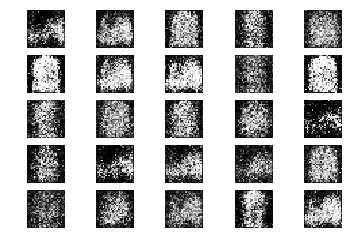

401 [D loss: 0.755875, accuracy: 64.06%] [G loss: 1.828104]
402 [D loss: 0.570810, accuracy: 68.75%] [G loss: 1.568553]
403 [D loss: 0.462855, accuracy: 81.25%] [G loss: 1.716623]
404 [D loss: 0.561156, accuracy: 76.56%] [G loss: 1.955008]
405 [D loss: 0.760671, accuracy: 60.94%] [G loss: 1.580367]
406 [D loss: 0.443237, accuracy: 79.69%] [G loss: 1.898023]
407 [D loss: 0.511596, accuracy: 79.69%] [G loss: 1.648116]
408 [D loss: 0.723497, accuracy: 71.88%] [G loss: 1.743653]
409 [D loss: 0.463385, accuracy: 79.69%] [G loss: 1.759176]
410 [D loss: 0.657942, accuracy: 70.31%] [G loss: 1.397231]
411 [D loss: 0.574097, accuracy: 64.06%] [G loss: 1.525521]
412 [D loss: 0.901140, accuracy: 59.38%] [G loss: 1.374968]
413 [D loss: 0.486727, accuracy: 75.00%] [G loss: 1.662601]
414 [D loss: 0.772702, accuracy: 56.25%] [G loss: 1.321193]
415 [D loss: 0.600450, accuracy: 70.31%] [G loss: 1.720362]
416 [D loss: 0.473742, accuracy: 84.38%] [G loss: 1.535830]
417 [D loss: 0.638884, accuracy: 76.56%]

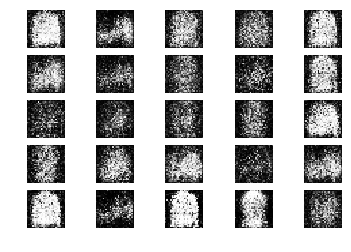

451 [D loss: 0.643445, accuracy: 71.88%] [G loss: 1.139137]
452 [D loss: 0.648388, accuracy: 65.62%] [G loss: 1.326691]
453 [D loss: 0.716197, accuracy: 53.12%] [G loss: 1.192096]
454 [D loss: 0.670231, accuracy: 53.12%] [G loss: 1.247806]
455 [D loss: 0.692987, accuracy: 60.94%] [G loss: 0.971232]
456 [D loss: 0.695139, accuracy: 64.06%] [G loss: 0.926642]
457 [D loss: 0.546011, accuracy: 70.31%] [G loss: 1.204699]
458 [D loss: 0.693234, accuracy: 67.19%] [G loss: 1.301940]
459 [D loss: 0.578328, accuracy: 71.88%] [G loss: 1.195892]
460 [D loss: 0.696846, accuracy: 65.62%] [G loss: 1.156249]
461 [D loss: 0.641491, accuracy: 65.62%] [G loss: 1.267160]
462 [D loss: 0.555433, accuracy: 73.44%] [G loss: 1.242272]
463 [D loss: 0.595091, accuracy: 67.19%] [G loss: 1.179580]
464 [D loss: 0.643408, accuracy: 62.50%] [G loss: 1.220096]
465 [D loss: 0.686350, accuracy: 68.75%] [G loss: 1.087515]
466 [D loss: 0.650107, accuracy: 60.94%] [G loss: 1.046891]
467 [D loss: 0.652467, accuracy: 56.25%]

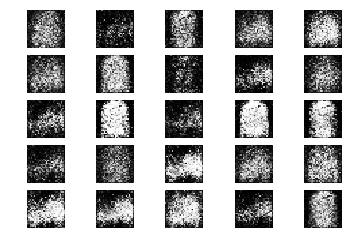

501 [D loss: 0.606502, accuracy: 71.88%] [G loss: 1.111922]
502 [D loss: 0.621653, accuracy: 65.62%] [G loss: 1.020096]
503 [D loss: 0.615615, accuracy: 70.31%] [G loss: 1.033487]
504 [D loss: 0.592976, accuracy: 75.00%] [G loss: 1.019986]
505 [D loss: 0.679379, accuracy: 54.69%] [G loss: 1.136228]
506 [D loss: 0.559773, accuracy: 70.31%] [G loss: 1.133131]
507 [D loss: 0.609397, accuracy: 70.31%] [G loss: 1.043022]
508 [D loss: 0.609333, accuracy: 59.38%] [G loss: 1.078624]
509 [D loss: 0.604747, accuracy: 60.94%] [G loss: 1.181982]
510 [D loss: 0.605075, accuracy: 67.19%] [G loss: 1.190801]
511 [D loss: 0.638599, accuracy: 68.75%] [G loss: 1.125506]
512 [D loss: 0.643026, accuracy: 62.50%] [G loss: 1.098286]
513 [D loss: 0.624614, accuracy: 64.06%] [G loss: 1.038164]
514 [D loss: 0.538970, accuracy: 76.56%] [G loss: 1.003637]
515 [D loss: 0.655442, accuracy: 62.50%] [G loss: 1.114452]
516 [D loss: 0.660085, accuracy: 60.94%] [G loss: 0.997816]
517 [D loss: 0.572185, accuracy: 64.06%]

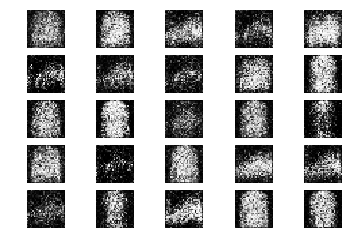

551 [D loss: 0.528162, accuracy: 78.12%] [G loss: 1.141655]
552 [D loss: 0.650721, accuracy: 64.06%] [G loss: 0.987773]
553 [D loss: 0.550302, accuracy: 68.75%] [G loss: 1.133024]
554 [D loss: 0.572465, accuracy: 78.12%] [G loss: 1.257277]
555 [D loss: 0.550206, accuracy: 73.44%] [G loss: 1.188235]
556 [D loss: 0.552908, accuracy: 79.69%] [G loss: 1.190051]
557 [D loss: 0.668809, accuracy: 64.06%] [G loss: 1.133551]
558 [D loss: 0.512310, accuracy: 76.56%] [G loss: 1.105314]
559 [D loss: 0.563944, accuracy: 75.00%] [G loss: 1.151168]
560 [D loss: 0.526709, accuracy: 78.12%] [G loss: 1.191131]
561 [D loss: 0.637710, accuracy: 70.31%] [G loss: 1.231902]
562 [D loss: 0.616674, accuracy: 71.88%] [G loss: 1.213819]
563 [D loss: 0.618090, accuracy: 67.19%] [G loss: 1.064241]
564 [D loss: 0.541428, accuracy: 73.44%] [G loss: 1.040712]
565 [D loss: 0.584963, accuracy: 68.75%] [G loss: 1.163979]
566 [D loss: 0.577463, accuracy: 73.44%] [G loss: 1.230507]
567 [D loss: 0.593225, accuracy: 67.19%]

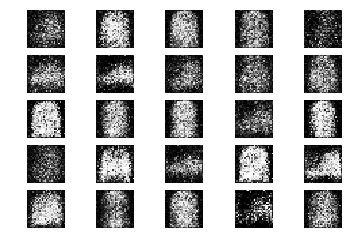

601 [D loss: 0.534408, accuracy: 71.88%] [G loss: 1.253171]
602 [D loss: 0.525571, accuracy: 79.69%] [G loss: 1.205174]
603 [D loss: 0.542841, accuracy: 76.56%] [G loss: 1.134261]
604 [D loss: 0.654047, accuracy: 64.06%] [G loss: 1.183709]
605 [D loss: 0.547180, accuracy: 79.69%] [G loss: 1.201941]
606 [D loss: 0.569730, accuracy: 76.56%] [G loss: 1.182179]
607 [D loss: 0.514915, accuracy: 76.56%] [G loss: 1.216609]
608 [D loss: 0.574333, accuracy: 71.88%] [G loss: 1.208702]
609 [D loss: 0.510416, accuracy: 75.00%] [G loss: 1.147544]
610 [D loss: 0.522696, accuracy: 71.88%] [G loss: 1.236380]
611 [D loss: 0.679286, accuracy: 60.94%] [G loss: 1.104032]
612 [D loss: 0.598367, accuracy: 75.00%] [G loss: 1.080281]
613 [D loss: 0.508001, accuracy: 81.25%] [G loss: 1.135821]
614 [D loss: 0.608684, accuracy: 70.31%] [G loss: 1.215998]
615 [D loss: 0.580958, accuracy: 68.75%] [G loss: 1.229946]
616 [D loss: 0.566498, accuracy: 68.75%] [G loss: 1.073445]
617 [D loss: 0.548405, accuracy: 68.75%]

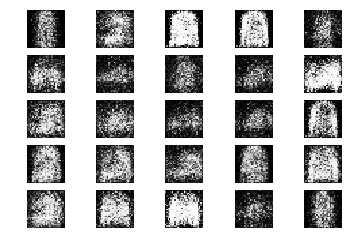

651 [D loss: 0.593895, accuracy: 73.44%] [G loss: 1.152287]
652 [D loss: 0.588254, accuracy: 67.19%] [G loss: 1.033084]
653 [D loss: 0.562610, accuracy: 73.44%] [G loss: 1.089268]
654 [D loss: 0.562257, accuracy: 73.44%] [G loss: 1.172291]
655 [D loss: 0.535268, accuracy: 76.56%] [G loss: 1.116904]
656 [D loss: 0.554315, accuracy: 76.56%] [G loss: 1.134733]
657 [D loss: 0.584575, accuracy: 65.62%] [G loss: 1.188729]
658 [D loss: 0.501253, accuracy: 75.00%] [G loss: 1.255329]
659 [D loss: 0.504397, accuracy: 79.69%] [G loss: 1.232664]
660 [D loss: 0.597182, accuracy: 68.75%] [G loss: 1.215840]
661 [D loss: 0.560197, accuracy: 67.19%] [G loss: 1.246034]
662 [D loss: 0.566901, accuracy: 76.56%] [G loss: 1.100082]
663 [D loss: 0.567366, accuracy: 64.06%] [G loss: 1.049558]
664 [D loss: 0.642996, accuracy: 64.06%] [G loss: 1.059312]
665 [D loss: 0.637020, accuracy: 71.88%] [G loss: 1.119739]
666 [D loss: 0.561074, accuracy: 75.00%] [G loss: 1.009797]
667 [D loss: 0.700157, accuracy: 59.38%]

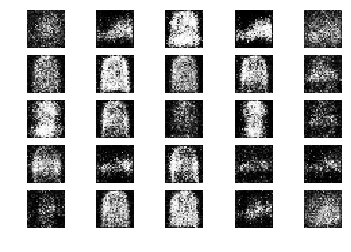

701 [D loss: 0.586562, accuracy: 73.44%] [G loss: 1.049527]
702 [D loss: 0.575399, accuracy: 71.88%] [G loss: 1.040930]
703 [D loss: 0.554151, accuracy: 78.12%] [G loss: 1.101817]
704 [D loss: 0.520363, accuracy: 76.56%] [G loss: 1.168131]
705 [D loss: 0.522086, accuracy: 70.31%] [G loss: 1.203943]
706 [D loss: 0.481357, accuracy: 79.69%] [G loss: 1.242170]
707 [D loss: 0.519443, accuracy: 75.00%] [G loss: 1.114790]
708 [D loss: 0.586141, accuracy: 70.31%] [G loss: 1.046107]
709 [D loss: 0.471998, accuracy: 81.25%] [G loss: 1.177858]
710 [D loss: 0.636839, accuracy: 65.62%] [G loss: 1.235418]
711 [D loss: 0.736835, accuracy: 53.12%] [G loss: 1.032166]
712 [D loss: 0.697421, accuracy: 59.38%] [G loss: 0.955362]
713 [D loss: 0.626488, accuracy: 60.94%] [G loss: 0.919364]
714 [D loss: 0.637090, accuracy: 68.75%] [G loss: 1.045817]
715 [D loss: 0.538291, accuracy: 70.31%] [G loss: 1.010225]
716 [D loss: 0.608209, accuracy: 67.19%] [G loss: 1.088362]
717 [D loss: 0.521914, accuracy: 81.25%]

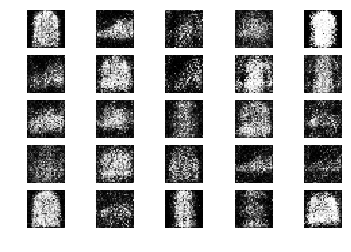

751 [D loss: 0.609788, accuracy: 67.19%] [G loss: 1.055583]
752 [D loss: 0.618113, accuracy: 68.75%] [G loss: 1.110973]
753 [D loss: 0.596805, accuracy: 70.31%] [G loss: 1.018163]
754 [D loss: 0.630256, accuracy: 68.75%] [G loss: 0.957845]
755 [D loss: 0.614449, accuracy: 68.75%] [G loss: 0.947775]
756 [D loss: 0.500810, accuracy: 82.81%] [G loss: 0.999259]
757 [D loss: 0.659408, accuracy: 60.94%] [G loss: 0.986570]
758 [D loss: 0.570657, accuracy: 75.00%] [G loss: 1.060112]
759 [D loss: 0.560807, accuracy: 73.44%] [G loss: 0.974506]
760 [D loss: 0.515414, accuracy: 76.56%] [G loss: 1.000206]
761 [D loss: 0.607545, accuracy: 73.44%] [G loss: 1.085930]
762 [D loss: 0.571611, accuracy: 65.62%] [G loss: 1.019003]
763 [D loss: 0.606358, accuracy: 62.50%] [G loss: 1.008318]
764 [D loss: 0.581723, accuracy: 73.44%] [G loss: 1.064512]
765 [D loss: 0.564164, accuracy: 73.44%] [G loss: 1.075630]
766 [D loss: 0.624670, accuracy: 62.50%] [G loss: 0.872316]
767 [D loss: 0.604069, accuracy: 67.19%]

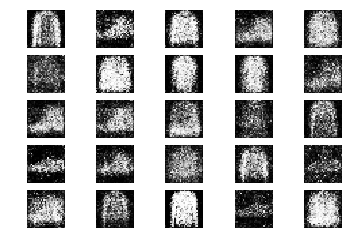

801 [D loss: 0.589152, accuracy: 67.19%] [G loss: 1.020359]
802 [D loss: 0.575575, accuracy: 70.31%] [G loss: 1.063631]
803 [D loss: 0.544617, accuracy: 81.25%] [G loss: 1.153420]
804 [D loss: 0.533132, accuracy: 68.75%] [G loss: 1.038872]
805 [D loss: 0.570291, accuracy: 64.06%] [G loss: 1.062601]
806 [D loss: 0.678952, accuracy: 57.81%] [G loss: 1.037768]
807 [D loss: 0.485984, accuracy: 79.69%] [G loss: 1.113023]
808 [D loss: 0.580458, accuracy: 68.75%] [G loss: 1.162084]
809 [D loss: 0.644628, accuracy: 62.50%] [G loss: 1.069696]
810 [D loss: 0.671995, accuracy: 56.25%] [G loss: 0.958077]
811 [D loss: 0.590752, accuracy: 70.31%] [G loss: 0.942444]
812 [D loss: 0.579924, accuracy: 70.31%] [G loss: 0.953930]
813 [D loss: 0.515046, accuracy: 78.12%] [G loss: 0.983295]
814 [D loss: 0.672259, accuracy: 64.06%] [G loss: 1.005685]
815 [D loss: 0.584569, accuracy: 73.44%] [G loss: 0.969901]
816 [D loss: 0.656094, accuracy: 68.75%] [G loss: 1.089334]
817 [D loss: 0.581107, accuracy: 75.00%]

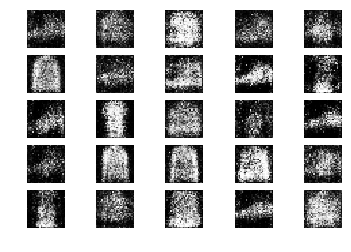

851 [D loss: 0.608916, accuracy: 68.75%] [G loss: 0.885552]
852 [D loss: 0.561842, accuracy: 68.75%] [G loss: 1.050305]
853 [D loss: 0.649672, accuracy: 62.50%] [G loss: 1.038779]
854 [D loss: 0.600234, accuracy: 60.94%] [G loss: 0.970285]
855 [D loss: 0.572512, accuracy: 65.62%] [G loss: 1.003081]
856 [D loss: 0.561877, accuracy: 71.88%] [G loss: 1.065291]
857 [D loss: 0.533817, accuracy: 75.00%] [G loss: 1.037089]
858 [D loss: 0.542258, accuracy: 73.44%] [G loss: 1.160327]
859 [D loss: 0.547241, accuracy: 71.88%] [G loss: 1.135341]
860 [D loss: 0.597441, accuracy: 67.19%] [G loss: 1.068072]
861 [D loss: 0.567922, accuracy: 70.31%] [G loss: 1.093856]
862 [D loss: 0.612547, accuracy: 68.75%] [G loss: 1.054611]
863 [D loss: 0.711545, accuracy: 59.38%] [G loss: 1.121203]
864 [D loss: 0.636824, accuracy: 64.06%] [G loss: 0.996438]
865 [D loss: 0.661915, accuracy: 59.38%] [G loss: 1.088535]
866 [D loss: 0.560991, accuracy: 71.88%] [G loss: 1.079704]
867 [D loss: 0.601382, accuracy: 68.75%]

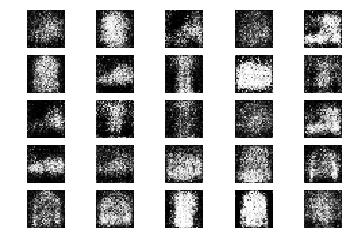

901 [D loss: 0.542916, accuracy: 75.00%] [G loss: 0.924879]
902 [D loss: 0.677916, accuracy: 65.62%] [G loss: 0.914077]
903 [D loss: 0.586721, accuracy: 68.75%] [G loss: 1.058335]
904 [D loss: 0.614873, accuracy: 65.62%] [G loss: 0.909648]
905 [D loss: 0.662307, accuracy: 67.19%] [G loss: 0.941287]
906 [D loss: 0.634174, accuracy: 59.38%] [G loss: 0.969573]
907 [D loss: 0.590934, accuracy: 70.31%] [G loss: 0.988130]
908 [D loss: 0.558400, accuracy: 75.00%] [G loss: 0.998753]
909 [D loss: 0.579854, accuracy: 71.88%] [G loss: 0.988002]
910 [D loss: 0.649213, accuracy: 64.06%] [G loss: 1.040621]
911 [D loss: 0.615439, accuracy: 65.62%] [G loss: 1.035148]
912 [D loss: 0.555818, accuracy: 73.44%] [G loss: 0.953636]
913 [D loss: 0.532453, accuracy: 78.12%] [G loss: 1.016263]
914 [D loss: 0.504604, accuracy: 75.00%] [G loss: 1.045865]
915 [D loss: 0.677264, accuracy: 54.69%] [G loss: 0.933488]
916 [D loss: 0.601038, accuracy: 75.00%] [G loss: 0.940680]
917 [D loss: 0.559542, accuracy: 75.00%]

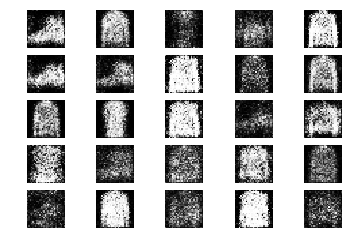

951 [D loss: 0.529169, accuracy: 78.12%] [G loss: 0.920399]
952 [D loss: 0.615275, accuracy: 70.31%] [G loss: 1.017296]
953 [D loss: 0.595930, accuracy: 70.31%] [G loss: 1.021992]
954 [D loss: 0.554062, accuracy: 71.88%] [G loss: 0.961752]
955 [D loss: 0.682044, accuracy: 64.06%] [G loss: 1.029557]
956 [D loss: 0.601322, accuracy: 62.50%] [G loss: 1.089428]
957 [D loss: 0.660023, accuracy: 60.94%] [G loss: 1.007607]
958 [D loss: 0.582197, accuracy: 71.88%] [G loss: 0.964561]
959 [D loss: 0.601347, accuracy: 71.88%] [G loss: 0.973602]
960 [D loss: 0.544438, accuracy: 68.75%] [G loss: 0.965153]
961 [D loss: 0.628687, accuracy: 65.62%] [G loss: 1.085627]
962 [D loss: 0.571486, accuracy: 68.75%] [G loss: 1.149493]
963 [D loss: 0.594009, accuracy: 68.75%] [G loss: 1.037917]
964 [D loss: 0.560949, accuracy: 73.44%] [G loss: 0.927303]
965 [D loss: 0.588935, accuracy: 68.75%] [G loss: 0.980208]
966 [D loss: 0.521458, accuracy: 78.12%] [G loss: 1.034236]
967 [D loss: 0.651357, accuracy: 64.06%]

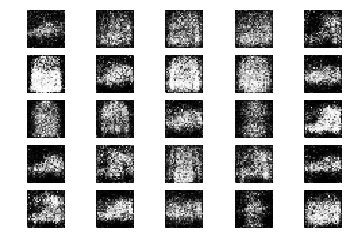

1001 [D loss: 0.566500, accuracy: 75.00%] [G loss: 0.952775]
1002 [D loss: 0.611781, accuracy: 67.19%] [G loss: 0.922895]
1003 [D loss: 0.629354, accuracy: 62.50%] [G loss: 0.941608]
1004 [D loss: 0.532674, accuracy: 76.56%] [G loss: 1.069257]
1005 [D loss: 0.654795, accuracy: 60.94%] [G loss: 1.074612]
1006 [D loss: 0.611983, accuracy: 68.75%] [G loss: 1.008854]
1007 [D loss: 0.549936, accuracy: 71.88%] [G loss: 1.043577]
1008 [D loss: 0.539774, accuracy: 71.88%] [G loss: 1.030983]
1009 [D loss: 0.530992, accuracy: 73.44%] [G loss: 0.940826]
1010 [D loss: 0.653624, accuracy: 64.06%] [G loss: 0.989209]
1011 [D loss: 0.624821, accuracy: 64.06%] [G loss: 0.951346]
1012 [D loss: 0.644546, accuracy: 62.50%] [G loss: 0.998016]
1013 [D loss: 0.536333, accuracy: 76.56%] [G loss: 1.047493]
1014 [D loss: 0.605223, accuracy: 71.88%] [G loss: 0.947086]
1015 [D loss: 0.589383, accuracy: 65.62%] [G loss: 0.970155]
1016 [D loss: 0.577318, accuracy: 76.56%] [G loss: 0.989270]
1017 [D loss: 0.630041, 

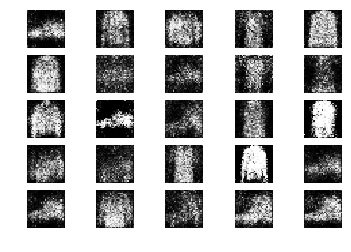

1051 [D loss: 0.582432, accuracy: 68.75%] [G loss: 1.059777]
1052 [D loss: 0.573768, accuracy: 75.00%] [G loss: 1.090336]
1053 [D loss: 0.673537, accuracy: 59.38%] [G loss: 0.990759]
1054 [D loss: 0.625896, accuracy: 70.31%] [G loss: 0.977461]
1055 [D loss: 0.597418, accuracy: 71.88%] [G loss: 1.007253]
1056 [D loss: 0.631176, accuracy: 64.06%] [G loss: 1.009421]
1057 [D loss: 0.582907, accuracy: 76.56%] [G loss: 1.034209]
1058 [D loss: 0.648329, accuracy: 65.62%] [G loss: 0.894204]
1059 [D loss: 0.615929, accuracy: 67.19%] [G loss: 0.776926]
1060 [D loss: 0.598632, accuracy: 70.31%] [G loss: 0.917390]
1061 [D loss: 0.510895, accuracy: 82.81%] [G loss: 1.012759]
1062 [D loss: 0.621862, accuracy: 62.50%] [G loss: 0.951955]
1063 [D loss: 0.653540, accuracy: 59.38%] [G loss: 0.915583]
1064 [D loss: 0.606377, accuracy: 64.06%] [G loss: 0.877343]
1065 [D loss: 0.574716, accuracy: 71.88%] [G loss: 0.908815]
1066 [D loss: 0.551299, accuracy: 71.88%] [G loss: 0.933724]
1067 [D loss: 0.586291, 

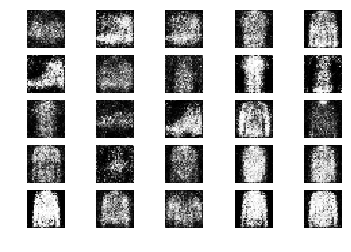

1101 [D loss: 0.599572, accuracy: 68.75%] [G loss: 0.954982]
1102 [D loss: 0.609056, accuracy: 59.38%] [G loss: 0.927793]
1103 [D loss: 0.653323, accuracy: 62.50%] [G loss: 0.899167]
1104 [D loss: 0.605916, accuracy: 71.88%] [G loss: 1.001750]
1105 [D loss: 0.649410, accuracy: 56.25%] [G loss: 0.982226]
1106 [D loss: 0.624868, accuracy: 62.50%] [G loss: 0.984329]
1107 [D loss: 0.587780, accuracy: 71.88%] [G loss: 0.919758]
1108 [D loss: 0.588796, accuracy: 71.88%] [G loss: 0.905245]
1109 [D loss: 0.659754, accuracy: 64.06%] [G loss: 0.963235]
1110 [D loss: 0.647618, accuracy: 54.69%] [G loss: 1.012997]
1111 [D loss: 0.718226, accuracy: 62.50%] [G loss: 0.861401]
1112 [D loss: 0.563965, accuracy: 78.12%] [G loss: 1.079239]
1113 [D loss: 0.651208, accuracy: 60.94%] [G loss: 0.903487]
1114 [D loss: 0.604670, accuracy: 67.19%] [G loss: 0.863151]
1115 [D loss: 0.609504, accuracy: 64.06%] [G loss: 0.864995]
1116 [D loss: 0.534843, accuracy: 81.25%] [G loss: 0.891443]
1117 [D loss: 0.569091, 

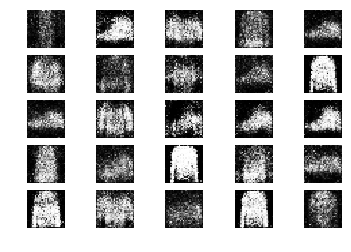

1151 [D loss: 0.611099, accuracy: 68.75%] [G loss: 0.927608]
1152 [D loss: 0.590620, accuracy: 76.56%] [G loss: 1.042385]
1153 [D loss: 0.615200, accuracy: 67.19%] [G loss: 0.982185]
1154 [D loss: 0.583502, accuracy: 71.88%] [G loss: 0.968419]
1155 [D loss: 0.597315, accuracy: 64.06%] [G loss: 1.016768]
1156 [D loss: 0.613624, accuracy: 64.06%] [G loss: 0.951853]
1157 [D loss: 0.536448, accuracy: 78.12%] [G loss: 0.947028]
1158 [D loss: 0.591584, accuracy: 70.31%] [G loss: 0.986608]
1159 [D loss: 0.575888, accuracy: 62.50%] [G loss: 0.917171]
1160 [D loss: 0.514203, accuracy: 73.44%] [G loss: 1.088159]
1161 [D loss: 0.676968, accuracy: 64.06%] [G loss: 0.994110]
1162 [D loss: 0.632218, accuracy: 70.31%] [G loss: 0.938050]
1163 [D loss: 0.548112, accuracy: 65.62%] [G loss: 1.012142]
1164 [D loss: 0.530249, accuracy: 73.44%] [G loss: 0.995887]
1165 [D loss: 0.639735, accuracy: 64.06%] [G loss: 0.975981]
1166 [D loss: 0.690821, accuracy: 56.25%] [G loss: 0.965952]
1167 [D loss: 0.641744, 

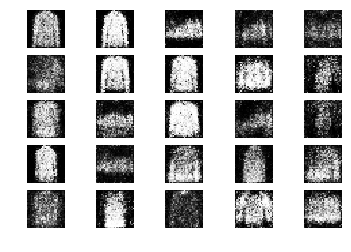

1201 [D loss: 0.657793, accuracy: 67.19%] [G loss: 0.921456]
1202 [D loss: 0.617528, accuracy: 62.50%] [G loss: 0.962152]
1203 [D loss: 0.586307, accuracy: 71.88%] [G loss: 1.017504]
1204 [D loss: 0.635967, accuracy: 67.19%] [G loss: 1.081993]
1205 [D loss: 0.563592, accuracy: 73.44%] [G loss: 0.911569]
1206 [D loss: 0.536380, accuracy: 76.56%] [G loss: 0.932652]
1207 [D loss: 0.549990, accuracy: 68.75%] [G loss: 0.970453]
1208 [D loss: 0.564627, accuracy: 71.88%] [G loss: 1.001420]
1209 [D loss: 0.574059, accuracy: 68.75%] [G loss: 0.955360]
1210 [D loss: 0.558023, accuracy: 70.31%] [G loss: 0.936284]
1211 [D loss: 0.657136, accuracy: 65.62%] [G loss: 1.015239]
1212 [D loss: 0.588036, accuracy: 67.19%] [G loss: 1.018462]
1213 [D loss: 0.623713, accuracy: 67.19%] [G loss: 0.940016]
1214 [D loss: 0.644632, accuracy: 60.94%] [G loss: 0.962332]
1215 [D loss: 0.611571, accuracy: 64.06%] [G loss: 0.976347]
1216 [D loss: 0.711224, accuracy: 56.25%] [G loss: 0.878703]
1217 [D loss: 0.639833, 

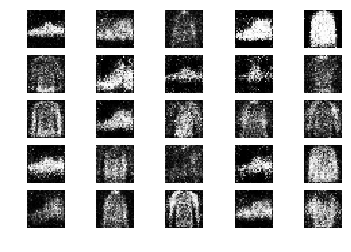

1251 [D loss: 0.557714, accuracy: 73.44%] [G loss: 0.906388]
1252 [D loss: 0.590527, accuracy: 70.31%] [G loss: 1.008338]
1253 [D loss: 0.565428, accuracy: 75.00%] [G loss: 0.988133]
1254 [D loss: 0.653530, accuracy: 59.38%] [G loss: 0.924378]
1255 [D loss: 0.570982, accuracy: 75.00%] [G loss: 0.960421]
1256 [D loss: 0.585686, accuracy: 68.75%] [G loss: 0.954971]
1257 [D loss: 0.574085, accuracy: 76.56%] [G loss: 0.946765]
1258 [D loss: 0.564818, accuracy: 70.31%] [G loss: 0.926606]
1259 [D loss: 0.575170, accuracy: 73.44%] [G loss: 0.928747]
1260 [D loss: 0.575822, accuracy: 71.88%] [G loss: 0.940596]
1261 [D loss: 0.574629, accuracy: 70.31%] [G loss: 1.019643]
1262 [D loss: 0.575566, accuracy: 71.88%] [G loss: 1.004424]
1263 [D loss: 0.563721, accuracy: 70.31%] [G loss: 0.938920]
1264 [D loss: 0.554042, accuracy: 70.31%] [G loss: 0.833671]
1265 [D loss: 0.606062, accuracy: 71.88%] [G loss: 1.014880]
1266 [D loss: 0.598247, accuracy: 62.50%] [G loss: 0.831295]
1267 [D loss: 0.525279, 

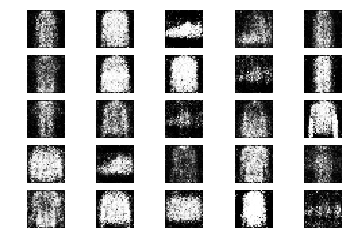

1301 [D loss: 0.592061, accuracy: 75.00%] [G loss: 0.942771]
1302 [D loss: 0.650388, accuracy: 59.38%] [G loss: 0.896014]
1303 [D loss: 0.561366, accuracy: 68.75%] [G loss: 0.991289]
1304 [D loss: 0.601161, accuracy: 65.62%] [G loss: 1.017244]
1305 [D loss: 0.640779, accuracy: 62.50%] [G loss: 1.046146]
1306 [D loss: 0.708173, accuracy: 50.00%] [G loss: 0.970575]
1307 [D loss: 0.592255, accuracy: 70.31%] [G loss: 0.972410]
1308 [D loss: 0.570730, accuracy: 73.44%] [G loss: 1.017578]
1309 [D loss: 0.581572, accuracy: 67.19%] [G loss: 0.961561]
1310 [D loss: 0.616696, accuracy: 70.31%] [G loss: 0.957614]
1311 [D loss: 0.539287, accuracy: 73.44%] [G loss: 0.993735]
1312 [D loss: 0.605034, accuracy: 68.75%] [G loss: 0.846224]
1313 [D loss: 0.611550, accuracy: 68.75%] [G loss: 0.910698]
1314 [D loss: 0.695635, accuracy: 59.38%] [G loss: 0.952563]
1315 [D loss: 0.532670, accuracy: 73.44%] [G loss: 0.979911]
1316 [D loss: 0.539059, accuracy: 68.75%] [G loss: 1.010213]
1317 [D loss: 0.578786, 

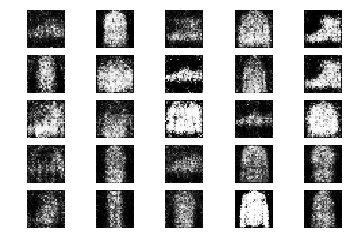

1351 [D loss: 0.604838, accuracy: 60.94%] [G loss: 0.929537]
1352 [D loss: 0.577214, accuracy: 71.88%] [G loss: 0.976434]
1353 [D loss: 0.610313, accuracy: 62.50%] [G loss: 0.989759]
1354 [D loss: 0.543361, accuracy: 73.44%] [G loss: 0.982913]
1355 [D loss: 0.616007, accuracy: 71.88%] [G loss: 0.929700]
1356 [D loss: 0.685171, accuracy: 62.50%] [G loss: 0.939060]
1357 [D loss: 0.514545, accuracy: 76.56%] [G loss: 0.922313]
1358 [D loss: 0.555808, accuracy: 75.00%] [G loss: 1.017239]
1359 [D loss: 0.524066, accuracy: 73.44%] [G loss: 1.023638]
1360 [D loss: 0.598288, accuracy: 67.19%] [G loss: 1.036479]
1361 [D loss: 0.597469, accuracy: 64.06%] [G loss: 1.031656]
1362 [D loss: 0.640107, accuracy: 60.94%] [G loss: 0.907248]
1363 [D loss: 0.665768, accuracy: 62.50%] [G loss: 0.927152]
1364 [D loss: 0.563151, accuracy: 71.88%] [G loss: 0.973273]
1365 [D loss: 0.602510, accuracy: 60.94%] [G loss: 1.028185]
1366 [D loss: 0.596333, accuracy: 70.31%] [G loss: 1.013988]
1367 [D loss: 0.594075, 

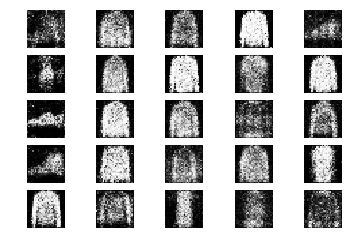

1401 [D loss: 0.557594, accuracy: 79.69%] [G loss: 0.876395]
1402 [D loss: 0.578838, accuracy: 73.44%] [G loss: 1.002002]
1403 [D loss: 0.589579, accuracy: 68.75%] [G loss: 1.021250]
1404 [D loss: 0.595941, accuracy: 65.62%] [G loss: 0.991578]
1405 [D loss: 0.627754, accuracy: 59.38%] [G loss: 0.912555]
1406 [D loss: 0.600159, accuracy: 70.31%] [G loss: 0.954756]
1407 [D loss: 0.532975, accuracy: 78.12%] [G loss: 0.896595]
1408 [D loss: 0.587893, accuracy: 73.44%] [G loss: 0.996162]
1409 [D loss: 0.633293, accuracy: 60.94%] [G loss: 0.935718]
1410 [D loss: 0.592587, accuracy: 73.44%] [G loss: 0.875018]
1411 [D loss: 0.614292, accuracy: 64.06%] [G loss: 0.916665]
1412 [D loss: 0.621555, accuracy: 68.75%] [G loss: 0.977551]
1413 [D loss: 0.608263, accuracy: 62.50%] [G loss: 0.946657]
1414 [D loss: 0.638360, accuracy: 65.62%] [G loss: 1.067821]
1415 [D loss: 0.605147, accuracy: 70.31%] [G loss: 1.016847]
1416 [D loss: 0.614805, accuracy: 64.06%] [G loss: 0.994249]
1417 [D loss: 0.546042, 

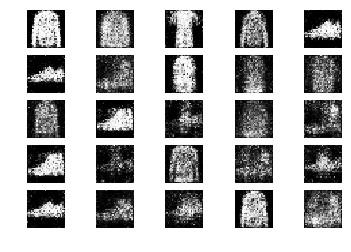

1451 [D loss: 0.633753, accuracy: 65.62%] [G loss: 0.978722]
1452 [D loss: 0.618833, accuracy: 67.19%] [G loss: 0.952540]
1453 [D loss: 0.657082, accuracy: 62.50%] [G loss: 0.927653]
1454 [D loss: 0.576142, accuracy: 78.12%] [G loss: 0.890222]
1455 [D loss: 0.568985, accuracy: 73.44%] [G loss: 0.932494]
1456 [D loss: 0.558789, accuracy: 75.00%] [G loss: 0.867309]
1457 [D loss: 0.592997, accuracy: 68.75%] [G loss: 0.861475]
1458 [D loss: 0.547585, accuracy: 70.31%] [G loss: 0.958229]
1459 [D loss: 0.573984, accuracy: 78.12%] [G loss: 0.902445]
1460 [D loss: 0.552238, accuracy: 87.50%] [G loss: 0.964374]
1461 [D loss: 0.662363, accuracy: 62.50%] [G loss: 0.997781]
1462 [D loss: 0.565112, accuracy: 65.62%] [G loss: 0.949634]
1463 [D loss: 0.548763, accuracy: 70.31%] [G loss: 0.921606]
1464 [D loss: 0.608701, accuracy: 59.38%] [G loss: 0.950008]
1465 [D loss: 0.541173, accuracy: 78.12%] [G loss: 0.979869]
1466 [D loss: 0.581650, accuracy: 68.75%] [G loss: 1.040541]
1467 [D loss: 0.565972, 

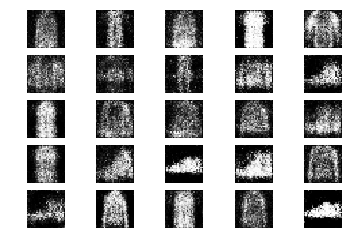

1501 [D loss: 0.605552, accuracy: 60.94%] [G loss: 0.932084]
1502 [D loss: 0.623693, accuracy: 60.94%] [G loss: 1.013834]
1503 [D loss: 0.603875, accuracy: 67.19%] [G loss: 1.047322]
1504 [D loss: 0.661813, accuracy: 67.19%] [G loss: 0.954319]
1505 [D loss: 0.592354, accuracy: 65.62%] [G loss: 0.878456]
1506 [D loss: 0.551716, accuracy: 75.00%] [G loss: 1.049428]
1507 [D loss: 0.665010, accuracy: 62.50%] [G loss: 0.955650]
1508 [D loss: 0.587472, accuracy: 75.00%] [G loss: 0.941475]
1509 [D loss: 0.651550, accuracy: 56.25%] [G loss: 0.942917]
1510 [D loss: 0.603440, accuracy: 65.62%] [G loss: 0.919101]
1511 [D loss: 0.631683, accuracy: 64.06%] [G loss: 1.003616]
1512 [D loss: 0.618383, accuracy: 64.06%] [G loss: 0.942966]
1513 [D loss: 0.609126, accuracy: 67.19%] [G loss: 0.839733]
1514 [D loss: 0.558534, accuracy: 75.00%] [G loss: 0.880087]
1515 [D loss: 0.685289, accuracy: 54.69%] [G loss: 0.939031]
1516 [D loss: 0.591449, accuracy: 76.56%] [G loss: 0.984966]
1517 [D loss: 0.622398, 

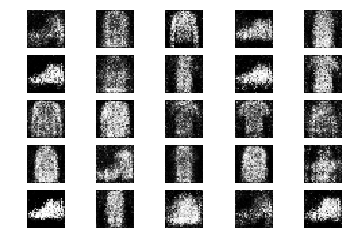

1551 [D loss: 0.598207, accuracy: 65.62%] [G loss: 0.916335]
1552 [D loss: 0.636531, accuracy: 65.62%] [G loss: 0.882574]
1553 [D loss: 0.559629, accuracy: 70.31%] [G loss: 0.965168]
1554 [D loss: 0.560432, accuracy: 75.00%] [G loss: 0.936379]
1555 [D loss: 0.606030, accuracy: 73.44%] [G loss: 0.892100]
1556 [D loss: 0.701596, accuracy: 54.69%] [G loss: 0.981714]
1557 [D loss: 0.642216, accuracy: 65.62%] [G loss: 1.004900]
1558 [D loss: 0.637053, accuracy: 64.06%] [G loss: 0.930774]
1559 [D loss: 0.596203, accuracy: 65.62%] [G loss: 0.979190]
1560 [D loss: 0.685060, accuracy: 59.38%] [G loss: 0.970789]
1561 [D loss: 0.597878, accuracy: 75.00%] [G loss: 0.914271]
1562 [D loss: 0.625053, accuracy: 71.88%] [G loss: 0.910405]
1563 [D loss: 0.599520, accuracy: 68.75%] [G loss: 0.881638]
1564 [D loss: 0.590930, accuracy: 67.19%] [G loss: 0.897712]
1565 [D loss: 0.631464, accuracy: 62.50%] [G loss: 0.895750]
1566 [D loss: 0.599630, accuracy: 70.31%] [G loss: 0.985570]
1567 [D loss: 0.648852, 

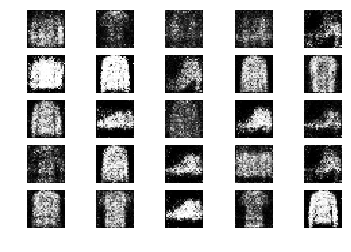

1601 [D loss: 0.573922, accuracy: 67.19%] [G loss: 1.025814]
1602 [D loss: 0.569593, accuracy: 68.75%] [G loss: 0.985285]
1603 [D loss: 0.618287, accuracy: 67.19%] [G loss: 0.995760]
1604 [D loss: 0.615166, accuracy: 70.31%] [G loss: 1.033720]
1605 [D loss: 0.579419, accuracy: 68.75%] [G loss: 1.020700]
1606 [D loss: 0.583136, accuracy: 73.44%] [G loss: 0.997953]
1607 [D loss: 0.598086, accuracy: 73.44%] [G loss: 1.002263]
1608 [D loss: 0.502004, accuracy: 76.56%] [G loss: 1.008989]
1609 [D loss: 0.559238, accuracy: 78.12%] [G loss: 0.900214]
1610 [D loss: 0.623855, accuracy: 68.75%] [G loss: 0.959290]
1611 [D loss: 0.642532, accuracy: 62.50%] [G loss: 1.072253]
1612 [D loss: 0.684786, accuracy: 62.50%] [G loss: 1.051565]
1613 [D loss: 0.552170, accuracy: 71.88%] [G loss: 0.900627]
1614 [D loss: 0.625627, accuracy: 59.38%] [G loss: 0.861104]
1615 [D loss: 0.642002, accuracy: 62.50%] [G loss: 1.002158]
1616 [D loss: 0.611622, accuracy: 67.19%] [G loss: 0.943863]
1617 [D loss: 0.632663, 

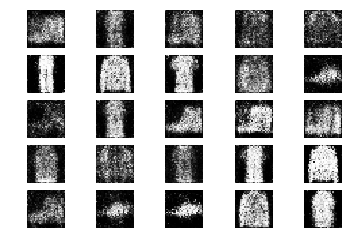

1651 [D loss: 0.616889, accuracy: 62.50%] [G loss: 0.979487]
1652 [D loss: 0.545522, accuracy: 73.44%] [G loss: 1.013863]
1653 [D loss: 0.654450, accuracy: 70.31%] [G loss: 0.956601]
1654 [D loss: 0.594941, accuracy: 70.31%] [G loss: 0.920883]
1655 [D loss: 0.550951, accuracy: 75.00%] [G loss: 0.935078]
1656 [D loss: 0.606450, accuracy: 60.94%] [G loss: 0.883900]
1657 [D loss: 0.590665, accuracy: 73.44%] [G loss: 0.833869]
1658 [D loss: 0.655432, accuracy: 65.62%] [G loss: 0.963219]
1659 [D loss: 0.567688, accuracy: 64.06%] [G loss: 0.985966]
1660 [D loss: 0.605699, accuracy: 59.38%] [G loss: 1.047392]
1661 [D loss: 0.635018, accuracy: 59.38%] [G loss: 0.952156]
1662 [D loss: 0.631599, accuracy: 64.06%] [G loss: 0.955085]
1663 [D loss: 0.665131, accuracy: 56.25%] [G loss: 0.969713]
1664 [D loss: 0.568194, accuracy: 67.19%] [G loss: 0.996450]
1665 [D loss: 0.588636, accuracy: 67.19%] [G loss: 0.973807]
1666 [D loss: 0.629696, accuracy: 56.25%] [G loss: 0.888095]
1667 [D loss: 0.635284, 

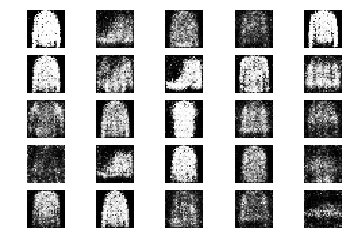

1701 [D loss: 0.642184, accuracy: 57.81%] [G loss: 1.050752]
1702 [D loss: 0.627538, accuracy: 73.44%] [G loss: 0.897888]
1703 [D loss: 0.616033, accuracy: 64.06%] [G loss: 0.996232]
1704 [D loss: 0.560724, accuracy: 73.44%] [G loss: 0.899028]
1705 [D loss: 0.590103, accuracy: 68.75%] [G loss: 0.901759]
1706 [D loss: 0.539488, accuracy: 76.56%] [G loss: 0.947342]
1707 [D loss: 0.661424, accuracy: 67.19%] [G loss: 0.955225]
1708 [D loss: 0.576689, accuracy: 71.88%] [G loss: 0.930179]
1709 [D loss: 0.568792, accuracy: 70.31%] [G loss: 0.946237]
1710 [D loss: 0.630157, accuracy: 64.06%] [G loss: 0.905459]
1711 [D loss: 0.648218, accuracy: 62.50%] [G loss: 0.903045]
1712 [D loss: 0.572692, accuracy: 71.88%] [G loss: 0.969541]
1713 [D loss: 0.687392, accuracy: 59.38%] [G loss: 1.039004]
1714 [D loss: 0.667070, accuracy: 59.38%] [G loss: 0.888033]
1715 [D loss: 0.642826, accuracy: 71.88%] [G loss: 0.893867]
1716 [D loss: 0.612035, accuracy: 68.75%] [G loss: 0.995611]
1717 [D loss: 0.610012, 

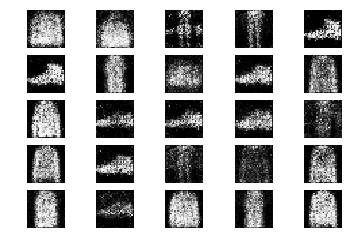

1751 [D loss: 0.580194, accuracy: 78.12%] [G loss: 0.914209]
1752 [D loss: 0.663832, accuracy: 65.62%] [G loss: 0.928318]
1753 [D loss: 0.584420, accuracy: 73.44%] [G loss: 0.964967]
1754 [D loss: 0.681678, accuracy: 51.56%] [G loss: 0.911285]
1755 [D loss: 0.607477, accuracy: 64.06%] [G loss: 0.905792]
1756 [D loss: 0.600236, accuracy: 65.62%] [G loss: 0.875256]
1757 [D loss: 0.606061, accuracy: 70.31%] [G loss: 0.921165]
1758 [D loss: 0.611263, accuracy: 64.06%] [G loss: 0.935644]
1759 [D loss: 0.568169, accuracy: 71.88%] [G loss: 0.934787]
1760 [D loss: 0.558716, accuracy: 70.31%] [G loss: 0.937100]
1761 [D loss: 0.576752, accuracy: 67.19%] [G loss: 0.975275]
1762 [D loss: 0.639804, accuracy: 57.81%] [G loss: 0.896245]
1763 [D loss: 0.669708, accuracy: 67.19%] [G loss: 0.954582]
1764 [D loss: 0.677936, accuracy: 50.00%] [G loss: 0.914543]
1765 [D loss: 0.681910, accuracy: 51.56%] [G loss: 0.873709]
1766 [D loss: 0.595147, accuracy: 70.31%] [G loss: 0.918328]
1767 [D loss: 0.598985, 

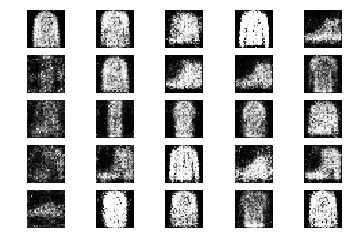

1801 [D loss: 0.557400, accuracy: 73.44%] [G loss: 1.001911]
1802 [D loss: 0.628618, accuracy: 64.06%] [G loss: 0.886179]
1803 [D loss: 0.708469, accuracy: 53.12%] [G loss: 0.902823]
1804 [D loss: 0.574219, accuracy: 70.31%] [G loss: 0.899466]
1805 [D loss: 0.621521, accuracy: 65.62%] [G loss: 0.906234]
1806 [D loss: 0.602165, accuracy: 68.75%] [G loss: 0.873811]
1807 [D loss: 0.630943, accuracy: 65.62%] [G loss: 0.988256]
1808 [D loss: 0.600145, accuracy: 60.94%] [G loss: 1.065946]
1809 [D loss: 0.622290, accuracy: 67.19%] [G loss: 1.011340]
1810 [D loss: 0.690170, accuracy: 54.69%] [G loss: 0.932119]
1811 [D loss: 0.592372, accuracy: 73.44%] [G loss: 0.904059]
1812 [D loss: 0.665880, accuracy: 54.69%] [G loss: 0.819490]
1813 [D loss: 0.623691, accuracy: 68.75%] [G loss: 0.875944]
1814 [D loss: 0.534243, accuracy: 79.69%] [G loss: 0.962578]
1815 [D loss: 0.585113, accuracy: 65.62%] [G loss: 0.898426]
1816 [D loss: 0.585417, accuracy: 68.75%] [G loss: 0.983564]
1817 [D loss: 0.585437, 

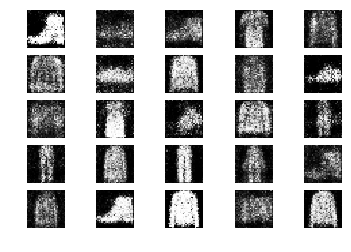

1851 [D loss: 0.626521, accuracy: 59.38%] [G loss: 0.948193]
1852 [D loss: 0.576728, accuracy: 71.88%] [G loss: 0.900215]
1853 [D loss: 0.561652, accuracy: 73.44%] [G loss: 0.795670]
1854 [D loss: 0.625230, accuracy: 54.69%] [G loss: 0.928480]
1855 [D loss: 0.648098, accuracy: 64.06%] [G loss: 0.943324]
1856 [D loss: 0.607071, accuracy: 70.31%] [G loss: 1.031580]
1857 [D loss: 0.621300, accuracy: 64.06%] [G loss: 1.064517]
1858 [D loss: 0.592100, accuracy: 70.31%] [G loss: 1.028431]
1859 [D loss: 0.617885, accuracy: 65.62%] [G loss: 0.911804]
1860 [D loss: 0.630411, accuracy: 64.06%] [G loss: 0.964973]
1861 [D loss: 0.585079, accuracy: 70.31%] [G loss: 0.941359]
1862 [D loss: 0.574563, accuracy: 73.44%] [G loss: 0.980115]
1863 [D loss: 0.566538, accuracy: 73.44%] [G loss: 0.902757]
1864 [D loss: 0.618297, accuracy: 67.19%] [G loss: 0.980664]
1865 [D loss: 0.559604, accuracy: 70.31%] [G loss: 1.016174]
1866 [D loss: 0.584332, accuracy: 73.44%] [G loss: 0.991416]
1867 [D loss: 0.553384, 

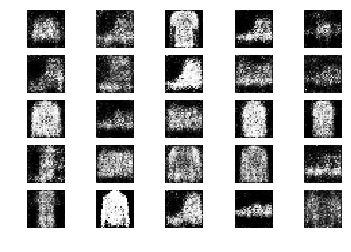

1901 [D loss: 0.604225, accuracy: 64.06%] [G loss: 0.960230]
1902 [D loss: 0.623927, accuracy: 62.50%] [G loss: 1.097008]
1903 [D loss: 0.570804, accuracy: 71.88%] [G loss: 1.054679]
1904 [D loss: 0.563449, accuracy: 76.56%] [G loss: 0.981213]
1905 [D loss: 0.646105, accuracy: 64.06%] [G loss: 0.960976]
1906 [D loss: 0.534840, accuracy: 78.12%] [G loss: 0.984266]
1907 [D loss: 0.633401, accuracy: 62.50%] [G loss: 0.872115]
1908 [D loss: 0.590360, accuracy: 65.62%] [G loss: 0.929539]
1909 [D loss: 0.603612, accuracy: 65.62%] [G loss: 0.972570]
1910 [D loss: 0.604459, accuracy: 68.75%] [G loss: 0.928435]
1911 [D loss: 0.624451, accuracy: 64.06%] [G loss: 0.869281]
1912 [D loss: 0.664643, accuracy: 60.94%] [G loss: 0.885940]
1913 [D loss: 0.669920, accuracy: 57.81%] [G loss: 0.922876]
1914 [D loss: 0.597635, accuracy: 67.19%] [G loss: 0.961778]
1915 [D loss: 0.566197, accuracy: 71.88%] [G loss: 0.873271]
1916 [D loss: 0.606625, accuracy: 67.19%] [G loss: 0.928995]
1917 [D loss: 0.737777, 

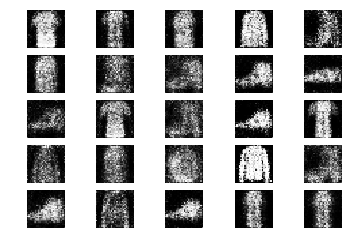

1951 [D loss: 0.654817, accuracy: 64.06%] [G loss: 0.861326]
1952 [D loss: 0.618854, accuracy: 67.19%] [G loss: 0.885517]
1953 [D loss: 0.658906, accuracy: 59.38%] [G loss: 1.010657]
1954 [D loss: 0.565771, accuracy: 71.88%] [G loss: 0.911262]
1955 [D loss: 0.639755, accuracy: 64.06%] [G loss: 0.899065]
1956 [D loss: 0.699330, accuracy: 53.12%] [G loss: 0.976018]
1957 [D loss: 0.627180, accuracy: 62.50%] [G loss: 0.985165]
1958 [D loss: 0.589944, accuracy: 65.62%] [G loss: 0.985982]
1959 [D loss: 0.618193, accuracy: 60.94%] [G loss: 0.990061]
1960 [D loss: 0.599269, accuracy: 71.88%] [G loss: 1.022268]
1961 [D loss: 0.595191, accuracy: 62.50%] [G loss: 0.984153]
1962 [D loss: 0.586859, accuracy: 65.62%] [G loss: 1.025993]
1963 [D loss: 0.587424, accuracy: 65.62%] [G loss: 1.033262]
1964 [D loss: 0.690000, accuracy: 54.69%] [G loss: 1.005304]
1965 [D loss: 0.633182, accuracy: 67.19%] [G loss: 0.911707]
1966 [D loss: 0.618167, accuracy: 70.31%] [G loss: 0.910266]
1967 [D loss: 0.563450, 

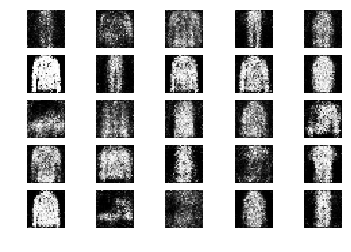

2001 [D loss: 0.576299, accuracy: 65.62%] [G loss: 1.000484]
2002 [D loss: 0.613059, accuracy: 70.31%] [G loss: 1.137123]
2003 [D loss: 0.591707, accuracy: 75.00%] [G loss: 1.043449]
2004 [D loss: 0.620072, accuracy: 59.38%] [G loss: 1.010416]
2005 [D loss: 0.678054, accuracy: 54.69%] [G loss: 0.858699]
2006 [D loss: 0.555180, accuracy: 70.31%] [G loss: 0.881542]
2007 [D loss: 0.594311, accuracy: 65.62%] [G loss: 0.916790]
2008 [D loss: 0.562870, accuracy: 71.88%] [G loss: 0.898027]
2009 [D loss: 0.549054, accuracy: 71.88%] [G loss: 0.881936]
2010 [D loss: 0.667498, accuracy: 59.38%] [G loss: 0.995181]
2011 [D loss: 0.582609, accuracy: 73.44%] [G loss: 0.949289]
2012 [D loss: 0.581256, accuracy: 73.44%] [G loss: 0.938680]
2013 [D loss: 0.660513, accuracy: 62.50%] [G loss: 0.840831]
2014 [D loss: 0.573308, accuracy: 68.75%] [G loss: 0.939909]
2015 [D loss: 0.574539, accuracy: 73.44%] [G loss: 1.061350]
2016 [D loss: 0.591601, accuracy: 68.75%] [G loss: 0.945587]
2017 [D loss: 0.536670, 

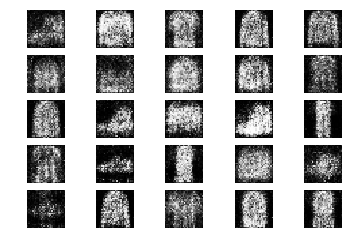

2051 [D loss: 0.605482, accuracy: 65.62%] [G loss: 0.849079]
2052 [D loss: 0.575695, accuracy: 78.12%] [G loss: 0.961592]
2053 [D loss: 0.601267, accuracy: 65.62%] [G loss: 0.956556]
2054 [D loss: 0.565038, accuracy: 71.88%] [G loss: 0.953756]
2055 [D loss: 0.599441, accuracy: 68.75%] [G loss: 1.049659]
2056 [D loss: 0.590334, accuracy: 65.62%] [G loss: 1.078844]
2057 [D loss: 0.631823, accuracy: 57.81%] [G loss: 1.036941]
2058 [D loss: 0.645048, accuracy: 64.06%] [G loss: 0.985673]
2059 [D loss: 0.635140, accuracy: 67.19%] [G loss: 0.972464]
2060 [D loss: 0.613330, accuracy: 70.31%] [G loss: 1.037632]
2061 [D loss: 0.566434, accuracy: 75.00%] [G loss: 1.032078]
2062 [D loss: 0.609619, accuracy: 62.50%] [G loss: 0.951161]
2063 [D loss: 0.595832, accuracy: 68.75%] [G loss: 0.909170]
2064 [D loss: 0.644340, accuracy: 64.06%] [G loss: 0.925975]
2065 [D loss: 0.620848, accuracy: 65.62%] [G loss: 0.899664]
2066 [D loss: 0.541782, accuracy: 79.69%] [G loss: 0.981207]
2067 [D loss: 0.576542, 

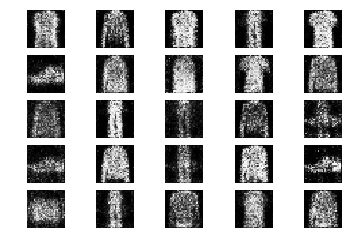

2101 [D loss: 0.612194, accuracy: 68.75%] [G loss: 1.000616]
2102 [D loss: 0.578767, accuracy: 68.75%] [G loss: 0.953102]
2103 [D loss: 0.611658, accuracy: 67.19%] [G loss: 0.926296]
2104 [D loss: 0.639461, accuracy: 59.38%] [G loss: 0.983920]
2105 [D loss: 0.616428, accuracy: 64.06%] [G loss: 1.116244]
2106 [D loss: 0.584228, accuracy: 68.75%] [G loss: 1.043169]
2107 [D loss: 0.605465, accuracy: 62.50%] [G loss: 1.063471]
2108 [D loss: 0.548577, accuracy: 76.56%] [G loss: 0.938757]
2109 [D loss: 0.601914, accuracy: 64.06%] [G loss: 0.957687]
2110 [D loss: 0.627268, accuracy: 67.19%] [G loss: 0.889598]
2111 [D loss: 0.562706, accuracy: 73.44%] [G loss: 1.015606]
2112 [D loss: 0.628692, accuracy: 68.75%] [G loss: 0.889274]
2113 [D loss: 0.626751, accuracy: 64.06%] [G loss: 0.832691]
2114 [D loss: 0.590884, accuracy: 70.31%] [G loss: 0.976165]
2115 [D loss: 0.596472, accuracy: 70.31%] [G loss: 0.954045]
2116 [D loss: 0.563017, accuracy: 68.75%] [G loss: 0.955282]
2117 [D loss: 0.580184, 

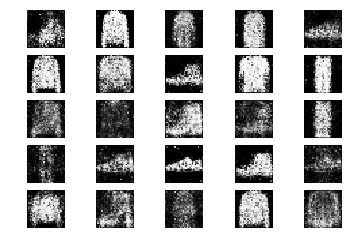

2151 [D loss: 0.639504, accuracy: 65.62%] [G loss: 0.899347]
2152 [D loss: 0.604874, accuracy: 65.62%] [G loss: 1.010058]
2153 [D loss: 0.597266, accuracy: 67.19%] [G loss: 1.016704]
2154 [D loss: 0.568240, accuracy: 78.12%] [G loss: 1.038337]
2155 [D loss: 0.578580, accuracy: 70.31%] [G loss: 1.021713]
2156 [D loss: 0.704446, accuracy: 53.12%] [G loss: 1.002722]
2157 [D loss: 0.605816, accuracy: 68.75%] [G loss: 0.896517]
2158 [D loss: 0.591293, accuracy: 76.56%] [G loss: 0.900449]
2159 [D loss: 0.685174, accuracy: 50.00%] [G loss: 0.897468]
2160 [D loss: 0.598130, accuracy: 65.62%] [G loss: 0.912093]
2161 [D loss: 0.635358, accuracy: 62.50%] [G loss: 0.880287]
2162 [D loss: 0.619073, accuracy: 70.31%] [G loss: 0.803637]
2163 [D loss: 0.686268, accuracy: 57.81%] [G loss: 0.932077]
2164 [D loss: 0.601460, accuracy: 70.31%] [G loss: 0.780690]
2165 [D loss: 0.557651, accuracy: 75.00%] [G loss: 0.928165]
2166 [D loss: 0.615734, accuracy: 67.19%] [G loss: 0.937908]
2167 [D loss: 0.554109, 

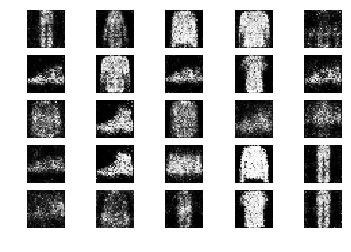

2201 [D loss: 0.612020, accuracy: 65.62%] [G loss: 0.899931]
2202 [D loss: 0.684136, accuracy: 54.69%] [G loss: 0.942222]
2203 [D loss: 0.582793, accuracy: 70.31%] [G loss: 0.991624]
2204 [D loss: 0.629678, accuracy: 67.19%] [G loss: 0.930713]
2205 [D loss: 0.590654, accuracy: 65.62%] [G loss: 0.947891]
2206 [D loss: 0.636502, accuracy: 65.62%] [G loss: 0.926098]
2207 [D loss: 0.592324, accuracy: 62.50%] [G loss: 0.976196]
2208 [D loss: 0.626604, accuracy: 68.75%] [G loss: 0.919957]
2209 [D loss: 0.628878, accuracy: 60.94%] [G loss: 0.952974]
2210 [D loss: 0.547283, accuracy: 76.56%] [G loss: 0.977080]
2211 [D loss: 0.564395, accuracy: 68.75%] [G loss: 1.256391]
2212 [D loss: 0.627317, accuracy: 67.19%] [G loss: 1.079369]
2213 [D loss: 0.700821, accuracy: 57.81%] [G loss: 0.879909]
2214 [D loss: 0.610467, accuracy: 67.19%] [G loss: 0.829024]
2215 [D loss: 0.547571, accuracy: 73.44%] [G loss: 0.921209]
2216 [D loss: 0.521489, accuracy: 82.81%] [G loss: 0.961844]
2217 [D loss: 0.541301, 

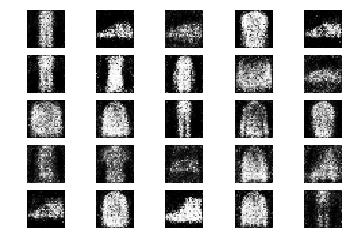

2251 [D loss: 0.626135, accuracy: 62.50%] [G loss: 0.971883]
2252 [D loss: 0.645584, accuracy: 65.62%] [G loss: 0.961075]
2253 [D loss: 0.570767, accuracy: 75.00%] [G loss: 0.984007]
2254 [D loss: 0.625362, accuracy: 65.62%] [G loss: 0.949296]
2255 [D loss: 0.702642, accuracy: 53.12%] [G loss: 0.956862]
2256 [D loss: 0.650524, accuracy: 60.94%] [G loss: 0.936399]
2257 [D loss: 0.601894, accuracy: 64.06%] [G loss: 0.941740]
2258 [D loss: 0.591003, accuracy: 68.75%] [G loss: 1.036667]
2259 [D loss: 0.603969, accuracy: 67.19%] [G loss: 0.916590]
2260 [D loss: 0.605969, accuracy: 68.75%] [G loss: 0.913836]
2261 [D loss: 0.626794, accuracy: 57.81%] [G loss: 0.941133]
2262 [D loss: 0.558149, accuracy: 67.19%] [G loss: 0.965535]
2263 [D loss: 0.684270, accuracy: 53.12%] [G loss: 0.886645]
2264 [D loss: 0.661354, accuracy: 59.38%] [G loss: 0.985073]
2265 [D loss: 0.579515, accuracy: 71.88%] [G loss: 0.978569]
2266 [D loss: 0.584783, accuracy: 60.94%] [G loss: 0.991363]
2267 [D loss: 0.565069, 

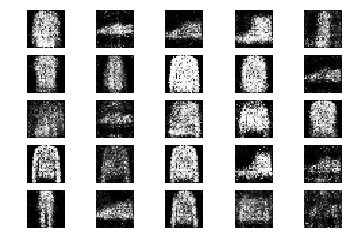

2301 [D loss: 0.612983, accuracy: 68.75%] [G loss: 0.984067]
2302 [D loss: 0.540018, accuracy: 75.00%] [G loss: 0.923375]
2303 [D loss: 0.561678, accuracy: 68.75%] [G loss: 1.003986]
2304 [D loss: 0.576404, accuracy: 71.88%] [G loss: 1.068801]
2305 [D loss: 0.558897, accuracy: 75.00%] [G loss: 1.012965]
2306 [D loss: 0.564975, accuracy: 73.44%] [G loss: 1.011458]
2307 [D loss: 0.645740, accuracy: 65.62%] [G loss: 0.962872]
2308 [D loss: 0.574973, accuracy: 76.56%] [G loss: 1.017329]
2309 [D loss: 0.610559, accuracy: 71.88%] [G loss: 0.851315]
2310 [D loss: 0.587896, accuracy: 70.31%] [G loss: 0.942043]
2311 [D loss: 0.592010, accuracy: 68.75%] [G loss: 1.083315]
2312 [D loss: 0.617331, accuracy: 70.31%] [G loss: 1.100634]
2313 [D loss: 0.549833, accuracy: 73.44%] [G loss: 0.940430]
2314 [D loss: 0.584747, accuracy: 70.31%] [G loss: 1.028379]
2315 [D loss: 0.699132, accuracy: 50.00%] [G loss: 0.963047]
2316 [D loss: 0.607777, accuracy: 67.19%] [G loss: 1.047317]
2317 [D loss: 0.631182, 

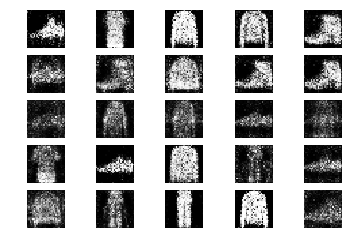

2351 [D loss: 0.581207, accuracy: 62.50%] [G loss: 1.034271]
2352 [D loss: 0.581595, accuracy: 75.00%] [G loss: 0.929123]
2353 [D loss: 0.626918, accuracy: 73.44%] [G loss: 1.005389]
2354 [D loss: 0.598176, accuracy: 67.19%] [G loss: 1.003681]
2355 [D loss: 0.625202, accuracy: 60.94%] [G loss: 1.009965]
2356 [D loss: 0.669999, accuracy: 62.50%] [G loss: 1.060791]
2357 [D loss: 0.605462, accuracy: 70.31%] [G loss: 1.025535]
2358 [D loss: 0.628985, accuracy: 67.19%] [G loss: 0.913603]
2359 [D loss: 0.571853, accuracy: 70.31%] [G loss: 0.937737]
2360 [D loss: 0.597234, accuracy: 70.31%] [G loss: 0.907245]
2361 [D loss: 0.683057, accuracy: 62.50%] [G loss: 0.873367]
2362 [D loss: 0.694560, accuracy: 59.38%] [G loss: 1.004851]
2363 [D loss: 0.598431, accuracy: 67.19%] [G loss: 0.974719]
2364 [D loss: 0.600748, accuracy: 68.75%] [G loss: 0.968725]
2365 [D loss: 0.637187, accuracy: 64.06%] [G loss: 0.934777]
2366 [D loss: 0.682094, accuracy: 53.12%] [G loss: 0.983002]
2367 [D loss: 0.533762, 

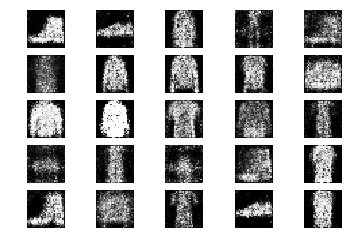

2401 [D loss: 0.604248, accuracy: 65.62%] [G loss: 1.036098]
2402 [D loss: 0.685066, accuracy: 56.25%] [G loss: 0.960808]
2403 [D loss: 0.668814, accuracy: 59.38%] [G loss: 0.968955]
2404 [D loss: 0.553674, accuracy: 73.44%] [G loss: 0.932759]
2405 [D loss: 0.675009, accuracy: 53.12%] [G loss: 0.930573]
2406 [D loss: 0.515879, accuracy: 85.94%] [G loss: 0.990565]
2407 [D loss: 0.533407, accuracy: 68.75%] [G loss: 0.997284]
2408 [D loss: 0.638357, accuracy: 62.50%] [G loss: 1.048356]
2409 [D loss: 0.637349, accuracy: 68.75%] [G loss: 1.091026]
2410 [D loss: 0.649674, accuracy: 57.81%] [G loss: 0.980998]
2411 [D loss: 0.583610, accuracy: 68.75%] [G loss: 0.989496]
2412 [D loss: 0.559627, accuracy: 71.88%] [G loss: 0.988514]
2413 [D loss: 0.621202, accuracy: 62.50%] [G loss: 0.971274]
2414 [D loss: 0.629242, accuracy: 60.94%] [G loss: 0.914707]
2415 [D loss: 0.663634, accuracy: 68.75%] [G loss: 0.894528]
2416 [D loss: 0.647600, accuracy: 70.31%] [G loss: 0.835627]
2417 [D loss: 0.602052, 

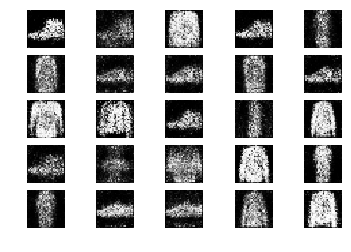

2451 [D loss: 0.584583, accuracy: 70.31%] [G loss: 0.926847]
2452 [D loss: 0.694332, accuracy: 51.56%] [G loss: 0.932207]
2453 [D loss: 0.575712, accuracy: 68.75%] [G loss: 0.898552]
2454 [D loss: 0.587885, accuracy: 64.06%] [G loss: 0.874934]
2455 [D loss: 0.612100, accuracy: 68.75%] [G loss: 0.981003]
2456 [D loss: 0.568129, accuracy: 70.31%] [G loss: 0.992679]
2457 [D loss: 0.581345, accuracy: 76.56%] [G loss: 0.954641]
2458 [D loss: 0.585679, accuracy: 67.19%] [G loss: 0.998286]
2459 [D loss: 0.548818, accuracy: 73.44%] [G loss: 0.977800]
2460 [D loss: 0.646961, accuracy: 53.12%] [G loss: 0.952672]
2461 [D loss: 0.600185, accuracy: 67.19%] [G loss: 0.917932]
2462 [D loss: 0.564700, accuracy: 76.56%] [G loss: 0.983149]
2463 [D loss: 0.491255, accuracy: 84.38%] [G loss: 1.052513]
2464 [D loss: 0.644928, accuracy: 65.62%] [G loss: 1.033137]
2465 [D loss: 0.595496, accuracy: 68.75%] [G loss: 0.975727]
2466 [D loss: 0.586735, accuracy: 67.19%] [G loss: 1.061580]
2467 [D loss: 0.626744, 

In [26]:
#comment insert
epochs = 2500

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size,1))

for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imgs = x_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5*np.add(d_loss_real, d_loss_fake)
    
    #blah blah blah
    noise = np.random.normal(0,1, (batch_size, 100))
    g_loss = combined.train_on_batch(noise, valid)
    
    #printing the ...
    print("%d [D loss: %f, accuracy: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
    if epoch % 50 ==0:
        sample_images(epoch)

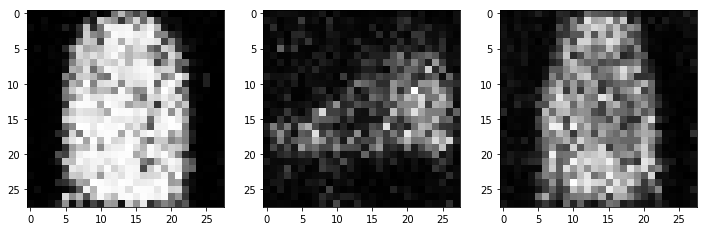

In [28]:
r, c = 5, 5
noise = np.random.normal(0,1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()